In [1]:
# load TensorBoard
%load_ext tensorboard
# imports
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from CustomData import CustomData
from NeuralNet import NeuralNet
from Visualisation import Visualisation

In [2]:
# parameters
EPOCHS = 30
BATCH_SIZE = 128

In [3]:
# generate custom data
data_gen = CustomData()

x_train, y_train = data_gen.generate_data(n=15000)
x_test, y_test = data_gen.generate_data(n=3000)

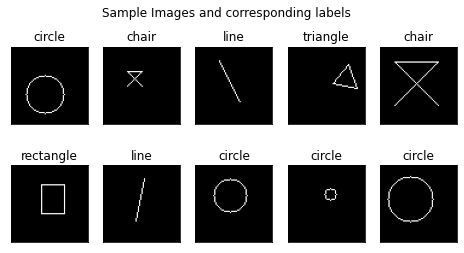

In [4]:
# show images
viz = Visualisation()
viz.img_plot("Sample Images and corresponding labels", x_train, y_train)

In [5]:
# preprocessing
x_train, y_train, labels_train = data_gen.preprocessing(x_train, y_train)
x_test, y_test, labels_test = data_gen.preprocessing(x_test, y_test)

# input shape and number of classes
inp_shape = x_train.shape
num_classes = len(labels_train)

In [6]:
# initialize model
model = NeuralNet(num_classes)

In [7]:
# Callbacks
# early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=2)
# tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stopping, tensorboard_cb]

In [8]:
# train model
history = model.comp_and_fit(x_train, y_train, EPOCHS, BATCH_SIZE, callbacks)

Epoch 1/30
94/94 - 49s - loss: 0.3392 - accuracy: 0.8652 - val_loss: 0.0744 - val_accuracy: 0.9770
Epoch 2/30
94/94 - 48s - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0377 - val_accuracy: 0.9887
Epoch 3/30
94/94 - 46s - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0168 - val_accuracy: 0.9983
Epoch 4/30
94/94 - 46s - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.0178 - val_accuracy: 0.9957
Epoch 5/30
94/94 - 46s - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.0095 - val_accuracy: 0.9983
Epoch 6/30
94/94 - 45s - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0089 - val_accuracy: 0.9980
Epoch 7/30
94/94 - 45s - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0120 - val_accuracy: 0.9973
Epoch 8/30
94/94 - 46s - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0075 - val_accuracy: 0.9987
Epoch 9/30
94/94 - 48s - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0100 - val_accuracy: 0.9977
Epoch 10/30
94/94 - 46s - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 11/

In [9]:
%tensorboard --logdir logs

Launching TensorBoard...

In [10]:
# model evaluation
loss, accuracy = model.test_eval(x_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 99.67 %


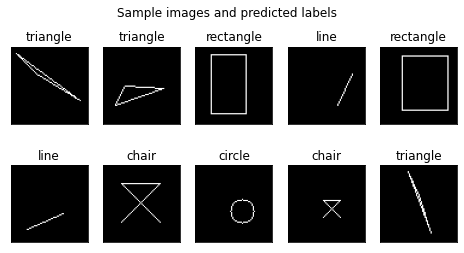

In [15]:
# predictions
y_preds = model.test_pred(x_test)
viz.img_plot("Sample images and predicted labels", x_test, labels_test[y_preds])

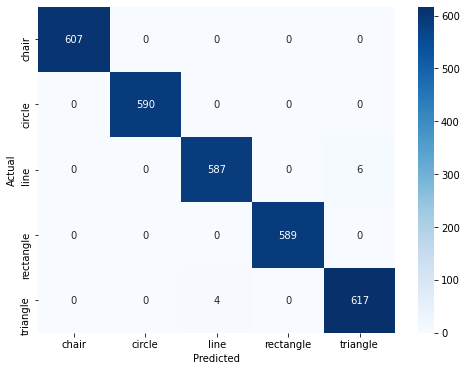

In [16]:
# confusion matrix
viz.cm_plot(y_test, y_preds, labels_test)